# Iris Flower Dataset

### Context

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

#### Import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### EDA

### Import dataset

In [2]:
dataset = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

In [3]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.shape

(150, 5)

In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's check if we have any missing values ? 

In [7]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Let's analyse quickly our target 

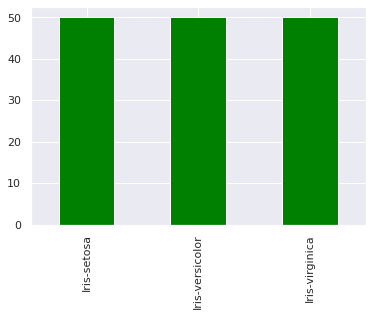

In [8]:
dataset.species.value_counts().plot(kind="bar",color='green')

We have 50 species in each categories

There are different types of plots like bar plot, box plot, scatter plot etc.
Scatter plot is very useful when we are analyzing the relation ship between 2 features on x and y axis.
In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.

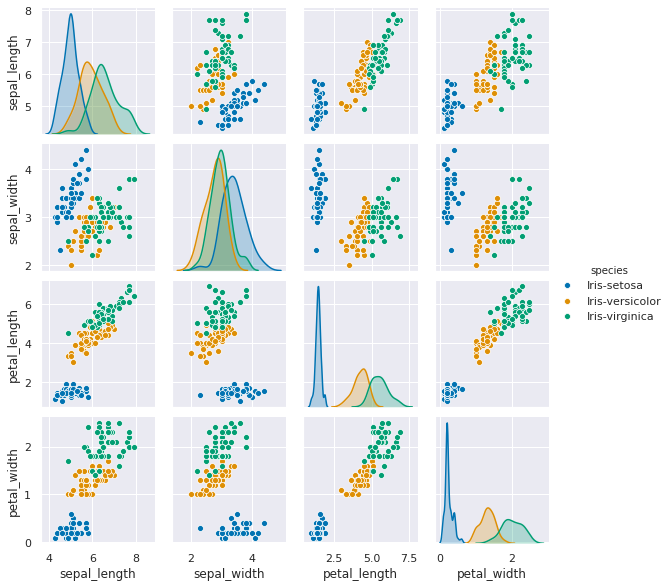

In [9]:
#sns.pairplot(dataset)
sns.pairplot(dataset, hue="species", height = 2, palette = 'colorblind');

Note that some variables seem to be highly correlated, e.g. petal_length and petal_width. In addition, the petal measurements separate the different species better than the sepal ones.

[]

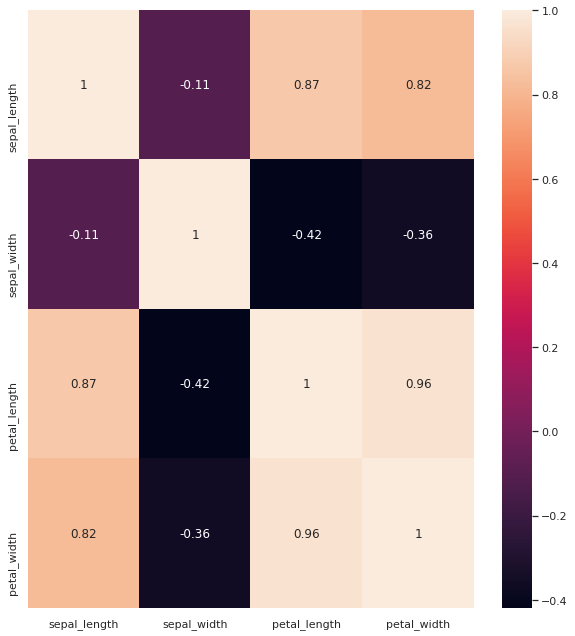

In [10]:
plt.figure(figsize=(10,11))
sns.heatmap(dataset.corr(),annot=True)
plt.plot()

Now we will see how these features are correlated to each other using heatmap in seaborn library. We can see that Sepal Length and Sepal Width features are slightly correlated with each other.

Let’s see how our data is distributed based on Sepal Length and Width features using scatterplot.

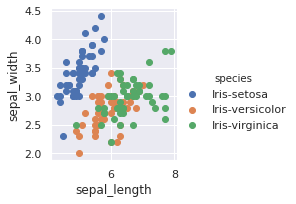

In [11]:
sns.FacetGrid(dataset,hue="species").map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

Similarly scatter plot of data based on Petal Length and Width features


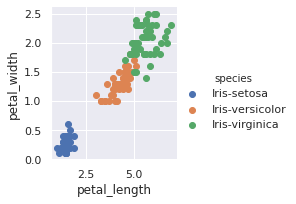

In [12]:
sns.FacetGrid(dataset,hue="species").map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()

We have now a better overview of our dataset. 
Let's conclude this EDA with my favorite automatic EDA libraries --- Pandas Profiling

### Pandas Profiling

In [13]:
from pandas_profiling import ProfileReport

In [14]:
design_report = ProfileReport(dataset)
design_report.to_file(output_file='report.html')

Another cool visualization tool is parallel coordinate plot, which represents each row as a line.

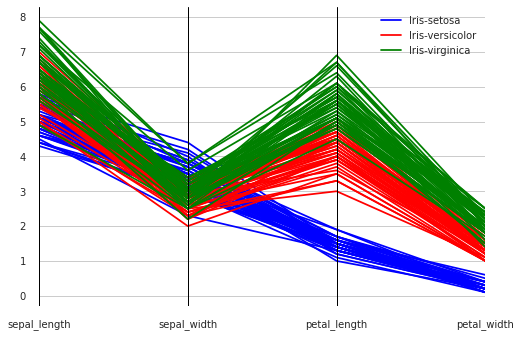

In [15]:
parallel_coordinates(dataset, "species", color = ['blue', 'red', 'green']);

As we have seen before, petal measurements can separate species better than the sepal ones.

## Train-Test Split


Now, we can split the dataset into a training set and a test set. Usually, we should also have a validation set, which is used to evaluate the performance of each classifier, fine-tune, and determine the best model. The test set is mainly used for reporting. However, due to the small size of this dataset, we can simplify it by using the test set to serve the purpose of the validation set.

In [16]:
list(dataset.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [17]:
X = dataset.drop('species',axis=1)

In [18]:
y = dataset.species

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [22]:
y_test.value_counts()

Iris-virginica     13
Iris-versicolor    13
Iris-setosa        12
Name: species, dtype: int64

In [23]:
y_train.value_counts()

Iris-setosa        38
Iris-versicolor    37
Iris-virginica     37
Name: species, dtype: int64

### Build Classifiers

### Decision Tree

In [24]:
classifier_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
classifier_dt.fit(X_train,y_train)
prediction=classifier_dt.predict(X_test)
print("Accuracy Score : " , accuracy_score(prediction,y_test))

Accuracy Score :  0.8947368421052632


This decision tree predicts 89.4% of the test data correctly.

We can use feature_importances to understand the importance of each predictor. 

In [25]:
classifier_dt.feature_importances_

array([0.        , 0.        , 0.41775238, 0.58224762])

From the output and based on the indices of the four features, we know that the first two features (sepal measurements) are of no importance, and only the petal ones are used to build this tree.

*We can also visiualize the classification rules*

In [26]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']

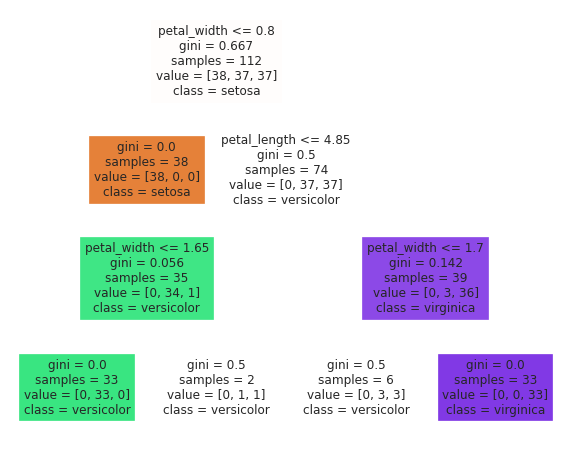

In [27]:
plt.figure(figsize = (10,8))
plot_tree(classifier_dt, feature_names = fn, class_names = cn, filled = True);

### Another way to show the prediction results is through a confusion matrix:

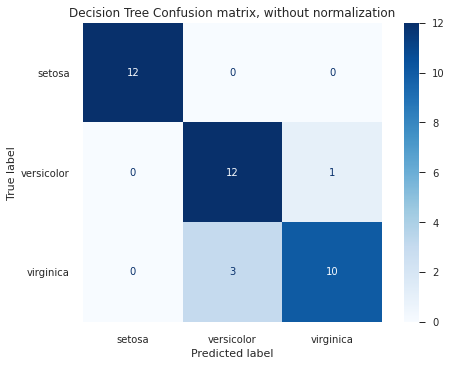

In [28]:
conf_mat = metrics.plot_confusion_matrix(classifier_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
conf_mat.ax_.set_title('Decision Tree Confusion matrix, without normalization');

Thanks to classification report we can see precision,recal and f1 of each class.

In [33]:
confusion = confusion_matrix(y_test, prediction)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, prediction)))



from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, prediction, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]

Accuracy: 0.89


Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        12
     Class 2       0.80      0.92      0.86        13
     Class 3       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



- Precision: It tells you what fraction of predictions as a positive class were actually positive. To calculate precision, use the following formula: TP/(TP+FP).
- Recall: It tells you what fraction of all positive samples were correctly predicted as positive by the classifier. It is also known as True Positive Rate (TPR), Sensitivity, Probability of Detection. To calculate Recall, use the following formula: TP/(TP+FN).
- F1-score: It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall. 